---

## Naïve Bayes Classification

---

### $\color{pink}{\text{(1) Some basic notions}}$

**Naïve Bayes** is a simple but powerful algorithm for predictive modeling.

Given an hypothesis H and evidence E, **Bayes' theorem** states that the relationship between the probability of the hypothesis before getting the evidence P(E) and the probability of the hypothesis after getting the evidence P(H|E) is:


$$ P(H|E) = \frac{P(E|H)P(H)}{P(E)} $$ 

$\color{purple}{\text{P(H|E)}}$ → **Posterior:** How probable is the hypothesis, given the observed evidence?

$\color{pink}{\text{P(H)}}$ → **Prior:** How probable was the hypothesis before observing the evidence?

$\color{lightblue}{\text{P(E|H)}}$ → **Likelihood:** How probable is the evidence, given that the hypothesis is true?

$\color{lightgreen}{\text{P(E)}}$ → **Marginal:** How probable is the evidence under all possible hypothesis?

### $\color{pink}{\text{(2) Dealing with not-categorical data}}$
### $\color{pink}{\text{(3) Code}}$

- Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

- Import dataset

In [2]:
filename = "dataframes/tonal_pitches.csv"
df = pd.read_csv(filename)

In [3]:
df.head()

,file,animal,chroma_0,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11
0,audio-dataset/cats_dogs/cat_74.wav,1,0.253685,0.208958,0.235730,0.415372,0.626089,0.219512,0.110606,0.198507,0.249876,0.163993,0.249633,0.532562
1,audio-dataset/cats_dogs/dog_barking_63.wav,0,0.124529,0.228619,0.484637,0.435963,0.314681,0.299143,0.345390,0.237107,0.070690,0.034080,0.021759,0.055118
2,audio-dataset/cats_dogs/cat_60.wav,1,0.148572,0.224725,0.396702,0.553182,0.355616,0.232814,0.216446,0.268361,0.313251,0.486694,0.666682,0.287571
3,audio-dataset/cats_dogs/dog_barking_77.wav,0,0.492111,0.460402,0.265370,0.153217,0.164354,0.264637,0.371551,0.277600,0.105860,0.138392,0.204018,0.324114
4,audio-dataset/cats_dogs/cat_48.wav,1,0.045169,0.016570,0.036343,0.069753,0.150920,0.141748,0.198717,0.278540,0.339571,0.432045,0.379332,0.195104


Histogram df [ "freq0" ]:

<AxesSubplot:>

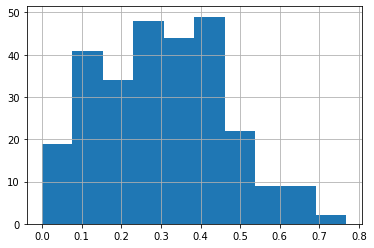

In [4]:
df["chroma_0"].hist()

Plot to see correlation between features:

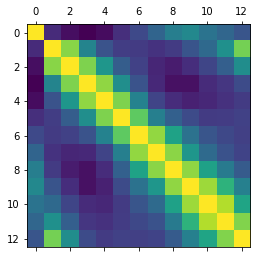

In [5]:
plt.matshow(df.corr())
plt.show()

Some plots:

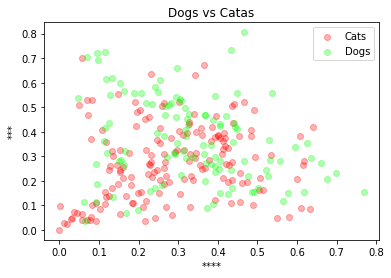

In [8]:
D = df[df['animal'] == 0]
C = df[df['animal'] == 1]

plt.title("Dogs vs Catas")
plt.xlabel("****")
plt.ylabel("***")
plt.scatter(C.chroma_0, C.chroma_3, color = "red", label = "Cats",alpha = 0.3)
plt.scatter(D.chroma_0,D.chroma_3, color = "lime", label = "Dogs",alpha = 0.3)
plt.legend()
plt.show()

- Declare feature vector and target vector.

In [7]:
X = df.drop(columns=['animal','file'], axis=1) 
y = df['animal']

- Split data into into separate training and test sets.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=0)

In [9]:
X_train.dtypes

freq0      float64
freq1      float64
freq2      float64
freq3      float64
freq4      float64
            ...   
freq246    float64
freq247    float64
freq248    float64
freq249    float64
freq250    float64
Length: 251, dtype: object

- Feature scaling

In [10]:
from sklearn.preprocessing import RobustScaler

cols = X_train.columns

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

,freq0,freq1,freq2,freq3,freq4,freq5,freq6,freq7,freq8,freq9,...,freq241,freq242,freq243,freq244,freq245,freq246,freq247,freq248,freq249,freq250
0,0.272207,0.232127,0.097951,-0.045612,-0.387230,-0.658945,-0.540858,-0.758486,-0.934818,-0.930060,...,-1.326507,-1.326507,-1.326507,-1.326507,-1.326507,-1.326507,-1.326507,-1.326507,-1.326507,-1.326507
1,0.774725,0.897095,0.784324,0.736410,0.113826,-0.048456,-0.161638,-0.320894,-0.422804,-0.535118,...,-0.140907,-0.140907,-0.140907,-0.140907,-0.140907,-0.140907,-0.140907,-0.140907,-0.140907,-0.140907
2,-0.096799,-0.287732,-0.895537,-1.441765,-1.282421,-1.085757,-0.312366,-0.160784,-0.377010,-1.040649,...,-0.074152,-0.074152,-0.074152,-0.074152,-0.074152,-0.074152,-0.074152,-0.074152,-0.074152,-0.074152
3,0.193873,-0.004041,-0.677274,-0.916301,-0.661072,-0.193273,0.669664,1.128687,0.878068,-0.171296,...,0.518003,0.518003,0.518003,0.518003,0.518003,0.518003,0.518003,0.518003,0.518003,0.518003
4,0.450688,0.538989,0.608466,0.579787,0.048692,-0.114780,-0.004344,0.291210,0.985776,0.949818,...,0.147375,0.147372,0.147369,0.147366,0.147364,0.147362,0.147360,0.147360,0.147359,0.147359


- Model training

In [11]:
model = GaussianNB()
model.fit(X_train,y_train)

print("Accuracy obtained:", model.score(X_test, y_test))

"""
The cross_val_score() function will be used to perform the evaluation, 
taking the dataset and cross-validation configuration and returning a list 
of scores calculated for each fold.
"""

cross_val_score(model, X, y, cv=8)

Accuracy obtained: 0.7567567567567568


array([0.71428571, 0.74285714, 0.74285714, 0.77142857, 0.77142857,
       0.76470588, 0.82352941, 0.73529412])

C:\Users\Júlia Garcia Torné\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


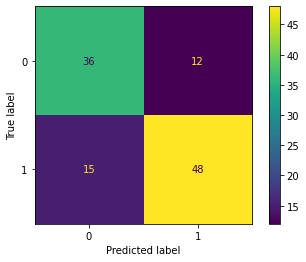

In [12]:
from sklearn.metrics import plot_confusion_matrix, classification_report

plot_confusion_matrix(model,X_test, y_test)